In [1]:
# importing necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# supressing warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# importing dataset
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting Dataset

In [4]:
lead.shape

(9240, 37)

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning 

In [6]:
# Here some of the columns have a level called 'Select' which can be replaced by NaN.
lead= lead.replace('Select', np.nan)

In [7]:
# checking fornull values
missing_value_percent = round(100*(lead.isnull().sum()/len(lead)),2)
missing_value_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# The columns having nullvalues more than 40% are:
col = list(missing_value_percent[missing_value_percent>40].index)
col

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [9]:
lead_df = lead.drop(col, axis=1)

In [10]:
# we can remove prospect ID
lead_df.drop(['Prospect ID'], axis =1, inplace = True)

In [11]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

#### Dealing unique valued columns

In [12]:
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

- Here the data is in a better format.

In [13]:
# Categorical columns in given data
categorical_cols = lead_df.select_dtypes(include='object').columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
# Checking value counts for all the categorical columns to deal with unique values and eliminate the skewed data

for col in categorical_cols:
    print(pd.DataFrame(lead_df[col].value_counts()))
    print('--'*50)

                         Lead Origin
Landing Page Submission         4886
API                             3580
Lead Add Form                    718
Lead Import                       55
Quick Add Form                     1
----------------------------------------------------------------------------------------------------
                   Lead Source
Google                    2868
Direct Traffic            2543
Olark Chat                1755
Organic Search            1154
Reference                  534
Welingak Website           142
Referral Sites             125
Facebook                    55
bing                         6
google                       5
Click2call                   4
Live Chat                    2
Press_Release                2
Social Media                 2
Pay per Click Ads            1
testone                      1
welearnblog_Home             1
WeLearn                      1
youtubechannel               1
blog                         1
NC_EDM                    

- Do Not call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque columns have 99% as 'No' in the data. We can drop these unique categorical columns.
- 'What matters most to you in choosing a course' and 'Country' skewed towards only one category. Dropping these columns from the data frame

In [15]:
lead_df.drop(['Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
            'What matters most to you in choosing a course', 'Country'], axis =1, inplace=True)

In [16]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          5860 non-null   object 
 10  What is your current occupation         6550 non-null   obje

In [17]:
# In lead source google appears in two way we can merge into one format and deal other unique categories
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [18]:
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Email Received','Resubscribed to emails',
                                             'View in browser link Clicked','Form Submitted on Website',
                                             'Approached upfront','Email Marked Spam','Had a Phone Conversation',
                                             'Unreachable','Unsubscribed','Email Bounced'], 'Other_activity')

In [19]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 
                                                            'Approached upfront','View in browser link Clicked',       
                                                            'Email Marked Spam','Email Received','Resubscribed to emails',
                                                             'Visited Booth in Tradeshow'],'Others')

In [20]:
# replacing tags with low frequency with "Other_tags"
lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS', 'Diploma holder (Not Eligible)',
                                         'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup','Still Thinking',
                                         'Lost to Others', 'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch',
                                         'Recognition issue (DEC approval)', 'Want to take admission but has financial problems',
                                        'University not recognized', 'switched off', 'Already a student', 'Not doing further education',
                                        'invalid number', 'wrong number given', 'Interested  in full time MBA'],'Other_tags')

### Missing Value Treatment

In [21]:
lead_df['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

In [22]:
lead_df['Lead Source'].mode()[0]

'Google'

In [23]:
# imputing missing values with mode
lead_df['Lead Source']=lead_df['Lead Source'].fillna(lead_df['Lead Source'].mode()[0])

In [24]:
lead_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [25]:
lead_df['TotalVisits']=lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].mode()[0])

In [26]:
lead_df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [27]:
lead_df['Page Views Per Visit']= lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].mode()[0])

In [28]:
lead_df['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [29]:
lead_df['Last Activity']= lead_df['Last Activity'].fillna(lead_df['Last Activity'].mode()[0])

In [30]:
lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [31]:
# Filling NaN with 'Not_specified'
lead_df['Specialization'].fillna('Not_specified', axis = 0, inplace = True)


In [32]:
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
lead_df['What is your current occupation']= lead_df['What is your current occupation'].fillna(lead_df['What is your current occupation'].mode()[0])

In [34]:
lead_df['Tags'].value_counts()

Will revert after reading the email    2072
Other_tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [35]:
lead_df['Tags']= lead_df['Tags'].fillna(lead_df['Tags'].mode()[0])

In [36]:
lead_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [37]:
lead_df['City']= lead_df['City'].fillna(lead_df['City'].mode()[0])

In [38]:
round(100*(lead_df.isnull().sum()/len(lead_df)),2)  

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

- Here we have cleaned all the missing values in the data and it is ready for analysis.

In [39]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not_specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not_specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not_specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


### Converting Yes and No to 0 & 1 respectively

In [40]:
varlst= ['Do Not Email','A free copy of Mastering The Interview']

def Mapping(x) :
    return x.map({"Yes":1,"No":0})

lead_df[varlst] = lead_df[varlst].apply(Mapping)

In [41]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not_specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not_specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not_specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


## EDA


In [42]:
# Numerical columns of given data
numerical_cols = lead_df.describe().columns
numerical_cols

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [43]:
# Categorical columns in given data
categorical_cols = lead_df.select_dtypes(include='object').columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

### Outlier Treatment

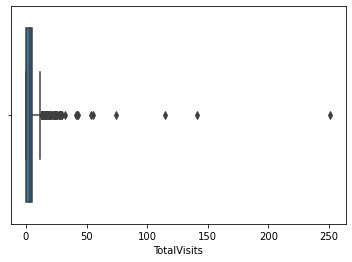

In [44]:
sns.boxplot(lead_df['TotalVisits'])
plt.show()

In [45]:
# since the number of outliers are preesent in the data we limit it into 95th percentile
perce = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= perce[0]] = perce[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= perce[1]] = perce[1]

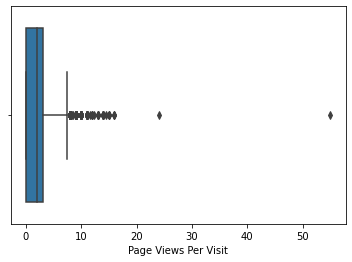

In [46]:
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

In [47]:
# since the number of outliers are preesent in the data we limit it into 95th percentile
perce = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= perce[0]] = perce[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= perce[1]] = perce[1]

### Univariate Analysis

In [48]:
def countplot(data):
    sns.countplot(data)
    plt.xticks(rotation = 90)
    plt.show()

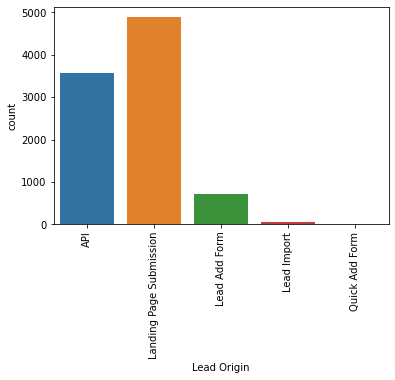

In [49]:
countplot(lead_df['Lead Origin'])

- Landing Page Submission have highest count followed by API.

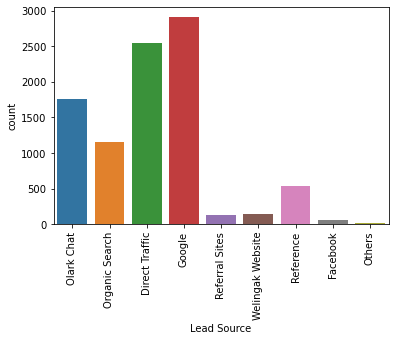

In [50]:
countplot(lead_df['Lead Source'])

- Most of the people heard this through Google then Direct Trafic.


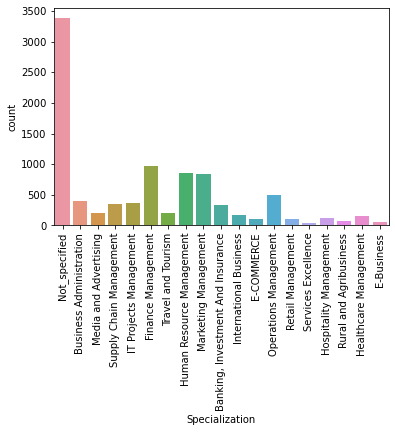

In [51]:
countplot(lead_df['Specialization'])

- Most people came from the field of Finance Management. 

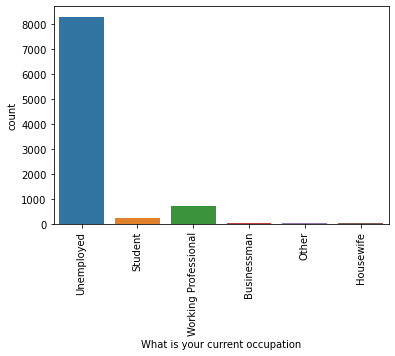

In [52]:
countplot(lead_df['What is your current occupation'])

- Most of the people came into this site are unemployed

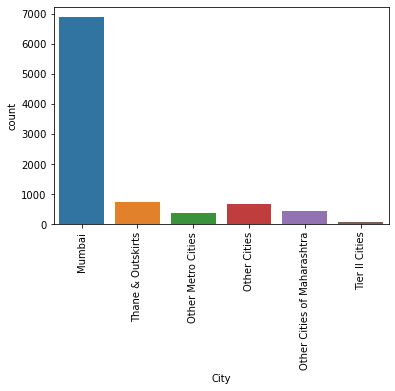

In [53]:
countplot(lead_df['City'])

- Mumbai have the higher count.

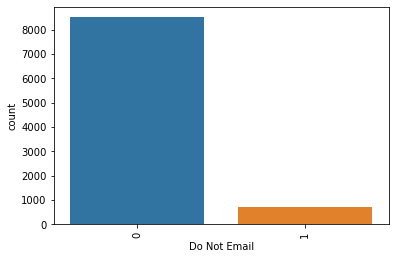

In [54]:
countplot(lead_df['Do Not Email'])

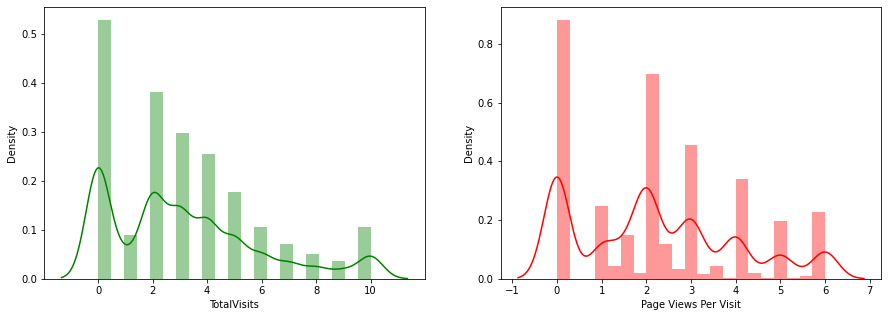

In [55]:
# Distribution plot for TotalVisits and Page Views Per Visit
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.distplot(lead_df.TotalVisits, color = 'green')
plt.subplot(1,2,2)
sns.distplot(lead_df['Page Views Per Visit'], color= 'red')
plt.show()

- We can see that TotalVisits are mostly below 30 and skewed towards right
- Page views per visit is mostly less than 10 and skewed towards right

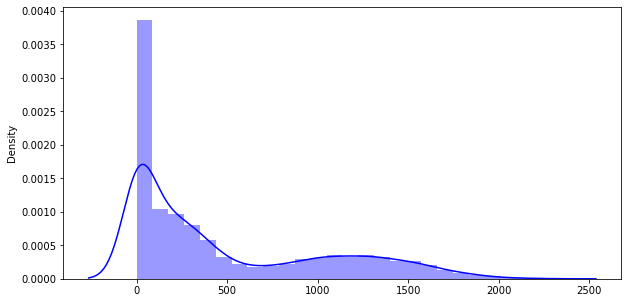

In [56]:
# Distribution plot for Total Time Spent on Website
plt.figure(figsize=[10,5])
sns.distplot(x =lead_df['Total Time Spent on Website'],color='blue')
plt.show()

- Total Time spent on website by most of the persons are below 500 and distribution is skewed towards right
- We can also see slight increase between 1000 and 1500

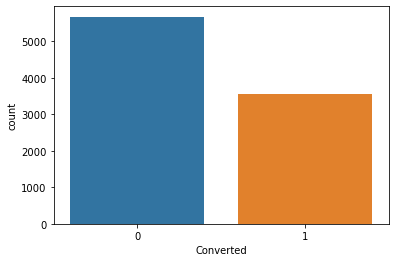

In [57]:
sns.countplot(lead_df['Converted'])
plt.show()

- Here only about 3300 people joins the course.

## Bivariate Analysis

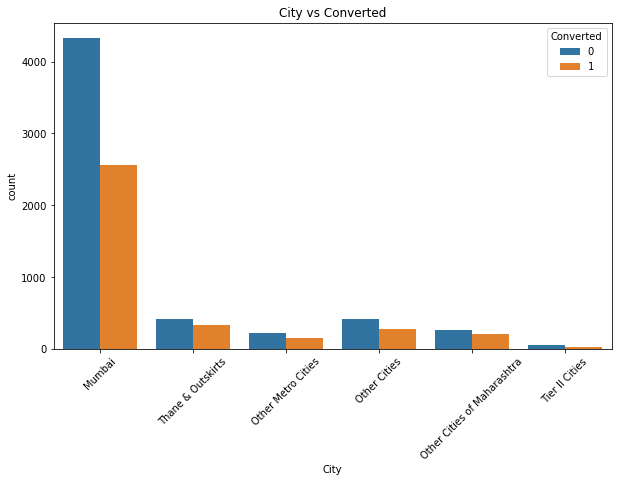

In [58]:
# Count plot for City vs converted 

plt.figure(figsize=[10,6])
sns.countplot(lead_df['City'],hue= lead_df.Converted)
plt.xticks(rotation=45)
plt.title('City vs Converted')
plt.show()

- For Mumbai conversion rate is not too high compared to others.

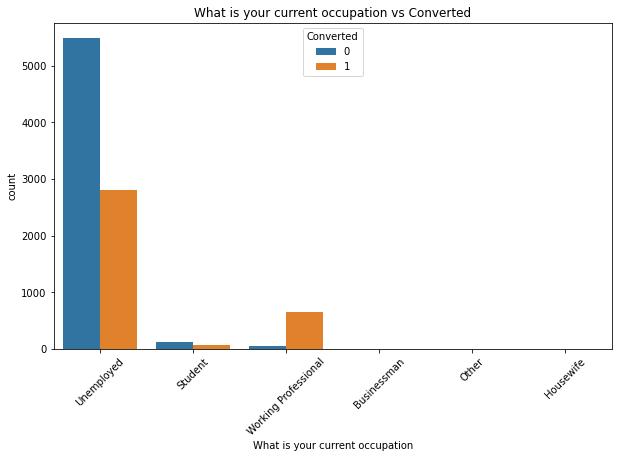

In [59]:
plt.figure(figsize=[10,6])
sns.countplot(lead_df['What is your current occupation'],hue= lead_df.Converted)
plt.xticks(rotation=45)
plt.title('What is your current occupation vs Converted')
plt.show()

- Working Proffessional have high conversion rate.

In [60]:
lead_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

#### We can remove those columns which are generated by sales team

In [61]:
lead_df.drop(['Last Notable Activity','Last Activity','Tags'], axis=1, inplace= True)

In [62]:
lead_df.describe().columns

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [63]:
 lead_df.select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

##  Creating Dummies for catagorical variables

In [64]:
dummy_variables= pd.get_dummies(lead_df[['Lead Origin', 'Lead Source','Specialization','What is your current occupation'
                                         ,'City']], drop_first=True)
dummy_variables.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
## concatination of dataframe
lead_df = pd.concat([lead_df,dummy_variables], axis=1)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Not_specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Not_specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not_specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [66]:
## we can drop those columns for which we have created dummy variables
lead_df = lead_df.drop(['Lead Number','Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City'], axis=1)

In [67]:
lead_df.shape

(9240, 46)

## Train-Test Split

In [68]:
from sklearn.model_selection import train_test_split

X = lead_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [69]:
y = lead_df['Converted']

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size =0.7, test_size = 0.3, random_state =100)

## Feature Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,0,0.0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6795,0,0.4,0.214349,0.221667,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3516,0,0.5,0.046655,0.416667,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8105,0,0.5,0.541373,0.833333,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3934,0,0.0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [73]:
# Checking the Conversion Rate
Conversion= (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Conversion

38.53896103896104

## Model Building and Evaluation

In [72]:
import statsmodels.api as sm

In [73]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6422
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2935.0
Date:                Sun, 08 May 2022   Deviance:                       5869.9
Time:                        10:57:57   Pearson chi2:                 8.49e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6863      1.039     -1.623      0.105      -3.723       0.350
Do Not Email                                            -1.3318      0.161     -8.259      0.000      -1.648      -1.016
TotalVisits                                              0.9227      0.180      5.128      0.000       0.570       1.275
Total Time Spent on Website                              4.4896      0.158     28.439      0.000       4.180       4.799
Page Views Per Visit                                    -0.4971      0.192     -2.584      0.010      -0.874      -0.120
A free copy of Mastering The Interview                  -0.2856      0.102     -2.794      0.005      -0.486      -0.085
Lead Origin_Landing Page Submission                     -0.7787      0.130     -5.978      0.000      -1.034      -0.523
Lead Origin_Lead Add Form                                3.5420      0.484      7.323      0.000       2.594       4.490
Lead Origin_Lead Import                                 -0.0289      2.509     -0.012      0.991      -4.947       4.889
Lead Origin_Quick Add Form                              20.0286   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                    -0.2311      2.509     -0.092      0.927      -5.149       4.686
Lead Source_Google                                       0.1911      0.108      1.772      0.076      -0.020       0.402
Lead Source_Olark Chat                                   1.0007      0.153      6.535      0.000       0.701       1.301
Lead Source_Organic Search                               0.1285      0.125      1.030      0.303      -0.116       0.373
Lead Source_Others                                       0.1597      0.627      0.255      0.799      -1.070       1.389
Lead Source_Reference                                    0.1645      0.522      0.315      0.753      -0.858       1.187
Lead Source_Referral Sites                              -0.3594      0.310     -1.158      0.247      -0.968       0.249
Lead Source_Welingak Website                             2.7617      0.865      3.192      0.001       1.066       4.457
Specialization_Business Administration                  -0.3151      0.233     -1.350      0.177      -0.773       0.142
Specialization_E-Business                               -0.3065      0.460     -0.666      0.505      -1.208       0.595
Specialization_E-COMMERCE                                0.0965      0.324      0.298      0.765      -0.538       0.731
Specialization_Finance Management                       -0.0994      0.199     -0.501      0.616      -0.489       0.290
Specialization_Healthcare Management                    -0

### Feature Elimination using RFE

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [75]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [76]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False,  True, False,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False])

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Origin_Quick Add Form', False, 22),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 19),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 10),
 ('Specialization_E-Business', False, 12),
 ('Specialization_E-COMMERCE', False, 4),
 ('Specialization_Finance Management', False, 26),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Huma

In [78]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Not_specified',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [79]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object')

### Assessing the model with StatsModels

In [80]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Not_specified',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [81]:

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2944.2
Date:                Sun, 08 May 2022   Deviance:                       5888.4
Time:                        10:58:05   Pearson chi2:                 8.73e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7417      1.020     -1.707      0.088      -3.741       0.258
Do Not Email                                            -1.3225      0.158     -8.354      0.000      -1.633      -1.012
TotalVisits                                              0.9384      0.177      5.292      0.000       0.591       1.286
Total Time Spent on Website                              4.4648      0.156     28.536      0.000       4.158       4.771
Page Views Per Visit                                    -0.4327      0.188     -2.305      0.021      -0.801      -0.065
A free copy of Mastering The Interview                  -0.3428      0.084     -4.081      0.000      -0.507      -0.178
Lead Origin_Landing Page Submission                     -0.8039      0.125     -6.417      0.000      -1.049      -0.558
Lead Origin_Lead Add Form                                3.5566      0.212     16.779      0.000       3.141       3.972
Lead Source_Olark Chat                                   0.8656      0.128      6.781      0.000       0.615       1.116
Lead Source_Referral Sites                              -0.5054      0.296     -1.709      0.087      -1.085       0.074
Lead Source_Welingak Website                             2.6131      0.744      3.513      0.000       1.155       4.071
Specialization_Hospitality Management                   -1.0037      0.316     -3.175      0.001      -1.623      -0.384
Specialization_International Business                   -0.3853      0.249     -1.549      0.121      -0.873       0.102
Specialization_Not_specified                            -1.1904      0.119    -10.000      0.000      -1.424      -0.957
Specialization_Retail Management                        -0.3672      0.325     -1.131      0.258      -1.004       0.269
Specialization_Rural and Agribusiness                    0.5375      0.376      1.430      0.153      -0.199       1.274
What is your current occupation_Housewife               23.1963   1.31e+04      0.002      0.999   -2.56e+04    2.56e+04
What is your current occupation_Other                   -0.2242      1.298     -0.173      0.863      -2.768       2.320
What is your current occupation_Student                  0.7914      1.039      0.762      0.446      -1.245       2.828
What is your current occupation_Unemployed               0.5743      1.015      0.566      0.572      -1.415       2.564
What is your current occupation_Working Professional     3.2552      1.031      3.158      0.002       1.235       5.275
========================================================================================================================
"""

In [82]:

# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1094.26
19,What is your current occupation_Unemployed,99.28
20,What is your current occupation_Working Profes...,78.23
18,What is your current occupation_Student,23.24
6,Lead Origin_Landing Page Submission,3.75
4,Page Views Per Visit,3.20
13,Specialization_Not_specified,3.11
2,TotalVisits,2.57
16,What is your current occupation_Housewife,2.50
17,What is your current occupation_Other,2.33


In [83]:
# The column "What is your current occupation_Housewife " have high pvalue , so drop that column
X_train_1= X_train_sm.drop(['What is your current occupation_Housewife'], axis=1)
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Do Not Email                                          6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   A free copy of Mastering The Interview                6468 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 8   Lead Source_Olark Chat                                6

#### Model 2

In [84]:
X_train_sm = sm.add_constant(X_train_1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2948.4
Date:                Sun, 08 May 2022   Deviance:                       5896.9
Time:                        10:58:32   Pearson chi2:                 8.71e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1842      0.761      0.242      0.809      -1.308       1.677
Do Not Email                                            -1.3231      0.158     -8.362      0.000      -1.633      -1.013
TotalVisits                                              0.9256      0.177      5.224      0.000       0.578       1.273
Total Time Spent on Website                              4.4601      0.156     28.523      0.000       4.154       4.767
Page Views Per Visit                                    -0.4298      0.188     -2.291      0.022      -0.797      -0.062
A free copy of Mastering The Interview                  -0.3367      0.084     -4.015      0.000      -0.501      -0.172
Lead Origin_Landing Page Submission                     -0.7950      0.125     -6.358      0.000      -1.040      -0.550
Lead Origin_Lead Add Form                                3.5563      0.212     16.783      0.000       3.141       3.972
Lead Source_Olark Chat                                   0.8629      0.128      6.762      0.000       0.613       1.113
Lead Source_Referral Sites                              -0.5013      0.296     -1.696      0.090      -1.081       0.078
Lead Source_Welingak Website                             2.6124      0.744      3.512      0.000       1.155       4.070
Specialization_Hospitality Management                   -1.0040      0.316     -3.178      0.001      -1.623      -0.385
Specialization_International Business                   -0.3863      0.249     -1.553      0.120      -0.874       0.101
Specialization_Not_specified                            -1.1852      0.119     -9.972      0.000      -1.418      -0.952
Specialization_Retail Management                        -0.3689      0.325     -1.137      0.256      -1.005       0.267
Specialization_Rural and Agribusiness                    0.5350      0.376      1.424      0.154      -0.201       1.271
What is your current occupation_Other                   -2.1506      1.104     -1.947      0.051      -4.315       0.014
What is your current occupation_Student                 -1.1384      0.783     -1.454      0.146      -2.673       0.396
What is your current occupation_Unemployed              -1.3555      0.751     -1.806      0.071      -2.827       0.116
What is your current occupation_Working Professional     1.3240      0.771      1.717      0.086      -0.188       2.836
========================================================================================================================
"""

In [85]:
# Calculate the VIFs

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,448.82
18,What is your current occupation_Unemployed,39.89
19,What is your current occupation_Working Profes...,31.81
17,What is your current occupation_Student,9.91
6,Lead Origin_Landing Page Submission,3.75
4,Page Views Per Visit,3.20
13,Specialization_Not_specified,3.11
2,TotalVisits,2.57
8,Lead Source_Olark Chat,2.28
7,Lead Origin_Lead Add Form,2.10


In [86]:
# The column 'Specialization_Retail Management " have high pvalue , so drop that column.
X_train_2= X_train_1.drop(['Specialization_Retail Management'], axis=1)
X_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Do Not Email                                          6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   A free copy of Mastering The Interview                6468 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 8   Lead Source_Olark Chat                                6

### Model 3

In [87]:
X_train_sm = sm.add_constant(X_train_2)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.1
Date:                Sun, 08 May 2022   Deviance:                       5898.2
Time:                        11:00:34   Pearson chi2:                 8.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1853      0.761      0.243      0.808      -1.307       1.678
Do Not Email                                            -1.3260      0.158     -8.382      0.000      -1.636      -1.016
TotalVisits                                              0.9269      0.177      5.231      0.000       0.580       1.274
Total Time Spent on Website                              4.4557      0.156     28.511      0.000       4.149       4.762
Page Views Per Visit                                    -0.4276      0.188     -2.280      0.023      -0.795      -0.060
A free copy of Mastering The Interview                  -0.3372      0.084     -4.022      0.000      -0.501      -0.173
Lead Origin_Landing Page Submission                     -0.7977      0.125     -6.380      0.000      -1.043      -0.553
Lead Origin_Lead Add Form                                3.5566      0.212     16.784      0.000       3.141       3.972
Lead Source_Olark Chat                                   0.8625      0.128      6.758      0.000       0.612       1.113
Lead Source_Referral Sites                              -0.5001      0.296     -1.692      0.091      -1.079       0.079
Lead Source_Welingak Website                             2.6125      0.744      3.512      0.000       1.155       4.070
Specialization_Hospitality Management                   -0.9971      0.316     -3.157      0.002      -1.616      -0.378
Specialization_International Business                   -0.3801      0.249     -1.529      0.126      -0.867       0.107
Specialization_Not_specified                            -1.1809      0.119     -9.940      0.000      -1.414      -0.948
Specialization_Rural and Agribusiness                    0.5418      0.376      1.443      0.149      -0.194       1.278
What is your current occupation_Other                   -2.1493      1.104     -1.946      0.052      -4.314       0.015
What is your current occupation_Student                 -1.1480      0.783     -1.466      0.143      -2.682       0.386
What is your current occupation_Unemployed              -1.3604      0.751     -1.812      0.070      -2.832       0.111
What is your current occupation_Working Professional     1.3176      0.771      1.708      0.088      -0.194       2.829
========================================================================================================================
"""

In [88]:
# Calculate the VIFs

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,448.82
17,What is your current occupation_Unemployed,39.88
18,What is your current occupation_Working Profes...,31.81
16,What is your current occupation_Student,9.91
6,Lead Origin_Landing Page Submission,3.75
4,Page Views Per Visit,3.20
13,Specialization_Not_specified,3.10
2,TotalVisits,2.57
8,Lead Source_Olark Chat,2.28
7,Lead Origin_Lead Add Form,2.10


In [89]:
####  The column "Specialization_Rural and Agribusiness " have high pvalue , so drop that column
X_train_3 = X_train_2.drop(['Specialization_Rural and Agribusiness'], axis=1)
X_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Do Not Email                                          6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   A free copy of Mastering The Interview                6468 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 8   Lead Source_Olark Chat                                6

### Model 4

In [90]:
# rebuilding the model

X_train_sm = sm.add_constant(X_train_3)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2950.1
Date:                Sun, 08 May 2022   Deviance:                       5900.3
Time:                        11:01:40   Pearson chi2:                 8.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1865      0.761      0.245      0.806      -1.306       1.679
Do Not Email                                            -1.3239      0.158     -8.370      0.000      -1.634      -1.014
TotalVisits                                              0.9297      0.177      5.251      0.000       0.583       1.277
Total Time Spent on Website                              4.4538      0.156     28.509      0.000       4.148       4.760
Page Views Per Visit                                    -0.4322      0.187     -2.306      0.021      -0.800      -0.065
A free copy of Mastering The Interview                  -0.3334      0.084     -3.980      0.000      -0.498      -0.169
Lead Origin_Landing Page Submission                     -0.7982      0.125     -6.386      0.000      -1.043      -0.553
Lead Origin_Lead Add Form                                3.5560      0.212     16.783      0.000       3.141       3.971
Lead Source_Olark Chat                                   0.8633      0.128      6.765      0.000       0.613       1.113
Lead Source_Referral Sites                              -0.4915      0.296     -1.660      0.097      -1.072       0.089
Lead Source_Welingak Website                             2.6126      0.744      3.513      0.000       1.155       4.070
Specialization_Hospitality Management                   -1.0032      0.316     -3.177      0.001      -1.622      -0.384
Specialization_International Business                   -0.3863      0.249     -1.555      0.120      -0.873       0.101
Specialization_Not_specified                            -1.1875      0.119    -10.006      0.000      -1.420      -0.955
What is your current occupation_Other                   -2.1498      1.104     -1.947      0.052      -4.314       0.015
What is your current occupation_Student                 -1.1262      0.783     -1.439      0.150      -2.660       0.408
What is your current occupation_Unemployed              -1.3552      0.751     -1.805      0.071      -2.827       0.116
What is your current occupation_Working Professional     1.3203      0.771      1.712      0.087      -0.191       2.832
========================================================================================================================
"""

In [91]:
# Calculate the VIFs
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,448.82
16,What is your current occupation_Unemployed,39.88
17,What is your current occupation_Working Profes...,31.81
15,What is your current occupation_Student,9.90
6,Lead Origin_Landing Page Submission,3.75
4,Page Views Per Visit,3.20
13,Specialization_Not_specified,3.10
2,TotalVisits,2.57
8,Lead Source_Olark Chat,2.28
7,Lead Origin_Lead Add Form,2.10


In [92]:
#The column "WWhat is your current occupation_Student" have high pvalue , so drop that column
X_train_4= X_train_3.drop(['What is your current occupation_Student'], axis=1)
X_train_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Do Not Email                                          6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   A free copy of Mastering The Interview                6468 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 8   Lead Source_Olark Chat                                6

### Model 5

In [93]:
# rebuilding the model
X_train_sm = sm.add_constant(X_train_4)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2951.3
Date:                Sun, 08 May 2022   Deviance:                       5902.5
Time:                        11:02:42   Pearson chi2:                 8.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8328      0.255     -3.261      0.001      -1.333      -0.332
Do Not Email                                            -1.3265      0.158     -8.387      0.000      -1.636      -1.016
TotalVisits                                              0.9302      0.177      5.256      0.000       0.583       1.277
Total Time Spent on Website                              4.4549      0.156     28.521      0.000       4.149       4.761
Page Views Per Visit                                    -0.4357      0.187     -2.324      0.020      -0.803      -0.068
A free copy of Mastering The Interview                  -0.3338      0.084     -3.986      0.000      -0.498      -0.170
Lead Origin_Landing Page Submission                     -0.8014      0.125     -6.413      0.000      -1.046      -0.556
Lead Origin_Lead Add Form                                3.5575      0.212     16.796      0.000       3.142       3.973
Lead Source_Olark Chat                                   0.8602      0.128      6.743      0.000       0.610       1.110
Lead Source_Referral Sites                              -0.4914      0.296     -1.660      0.097      -1.072       0.089
Lead Source_Welingak Website                             2.6112      0.744      3.511      0.000       1.153       4.069
Specialization_Hospitality Management                   -1.0073      0.316     -3.189      0.001      -1.626      -0.388
Specialization_International Business                   -0.3887      0.249     -1.564      0.118      -0.876       0.098
Specialization_Not_specified                            -1.1923      0.119    -10.052      0.000      -1.425      -0.960
What is your current occupation_Other                   -1.1264      0.838     -1.344      0.179      -2.769       0.517
What is your current occupation_Unemployed              -0.3305      0.213     -1.554      0.120      -0.747       0.086
What is your current occupation_Working Professional     2.3444      0.277      8.452      0.000       1.801       2.888
========================================================================================================================
"""

In [94]:
# Calculate the VIFs
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.38
16,What is your current occupation_Working Profes...,4.11
15,What is your current occupation_Unemployed,4.05
6,Lead Origin_Landing Page Submission,3.74
4,Page Views Per Visit,3.20
13,Specialization_Not_specified,3.09
2,TotalVisits,2.57
8,Lead Source_Olark Chat,2.28
7,Lead Origin_Lead Add Form,2.10
5,A free copy of Mastering The Interview,1.53


In [95]:
####  The column "What is your current occupation_Other	" have high pvalue , so drop that column
X_train_5= X_train_4.drop(['What is your current occupation_Other'], axis=1)
X_train_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Do Not Email                                          6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   A free copy of Mastering The Interview                6468 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 8   Lead Source_Olark Chat                                6

In [96]:
# rebuilding the model
X_train_sm = sm.add_constant(X_train_5)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2952.2
Date:                Sun, 08 May 2022   Deviance:                       5904.4
Time:                        11:04:11   Pearson chi2:                 8.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9063      0.251     -3.608      0.000      -1.399      -0.414
Do Not Email                                            -1.3309      0.158     -8.410      0.000      -1.641      -1.021
TotalVisits                                              0.9245      0.177      5.226      0.000       0.578       1.271
Total Time Spent on Website                              4.4485      0.156     28.510      0.000       4.143       4.754
Page Views Per Visit                                    -0.4365      0.187     -2.329      0.020      -0.804      -0.069
A free copy of Mastering The Interview                  -0.3337      0.084     -3.986      0.000      -0.498      -0.170
Lead Origin_Landing Page Submission                     -0.7980      0.125     -6.385      0.000      -1.043      -0.553
Lead Origin_Lead Add Form                                3.5575      0.212     16.798      0.000       3.142       3.973
Lead Source_Olark Chat                                   0.8596      0.128      6.741      0.000       0.610       1.110
Lead Source_Referral Sites                              -0.4896      0.296     -1.655      0.098      -1.070       0.090
Lead Source_Welingak Website                             2.6084      0.744      3.507      0.000       1.151       4.066
Specialization_Hospitality Management                   -1.0034      0.316     -3.178      0.001      -1.622      -0.385
Specialization_International Business                   -0.3864      0.248     -1.555      0.120      -0.873       0.101
Specialization_Not_specified                            -1.1893      0.119    -10.024      0.000      -1.422      -0.957
What is your current occupation_Unemployed              -0.2561      0.207     -1.237      0.216      -0.662       0.150
What is your current occupation_Working Professional     2.4189      0.273      8.857      0.000       1.884       2.954
========================================================================================================================
"""

In [97]:
# Calculate the VIFs
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.11
15,What is your current occupation_Working Profes...,3.95
14,What is your current occupation_Unemployed,3.85
6,Lead Origin_Landing Page Submission,3.74
4,Page Views Per Visit,3.20
13,Specialization_Not_specified,3.09
2,TotalVisits,2.56
8,Lead Source_Olark Chat,2.28
7,Lead Origin_Lead Add Form,2.10
5,A free copy of Mastering The Interview,1.53


In [98]:
#  The column "What is your current occupation_Unemployed" have high pvalue , so drop that column
X_train_6= X_train_5.drop(['What is your current occupation_Unemployed'], axis=1)
X_train_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Do Not Email                                          6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   A free copy of Mastering The Interview                6468 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 8   Lead Source_Olark Chat                                6

In [99]:
# rebuilding the model
X_train_sm = sm.add_constant(X_train_6)
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2952.9
Date:                Sun, 08 May 2022   Deviance:                       5905.9
Time:                        11:05:36   Pearson chi2:                 8.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1562      0.149     -7.759      0.000      -1.448      -0.864
Do Not Email                                            -1.3315      0.158     -8.411      0.000      -1.642      -1.021
TotalVisits                                              0.9268      0.177      5.241      0.000       0.580       1.273
Total Time Spent on Website                              4.4494      0.156     28.518      0.000       4.144       4.755
Page Views Per Visit                                    -0.4383      0.187     -2.340      0.019      -0.805      -0.071
A free copy of Mastering The Interview                  -0.3340      0.084     -3.991      0.000      -0.498      -0.170
Lead Origin_Landing Page Submission                     -0.7978      0.125     -6.382      0.000      -1.043      -0.553
Lead Origin_Lead Add Form                                3.5616      0.212     16.826      0.000       3.147       3.976
Lead Source_Olark Chat                                   0.8630      0.127      6.769      0.000       0.613       1.113
Lead Source_Referral Sites                              -0.4948      0.296     -1.672      0.094      -1.075       0.085
Lead Source_Welingak Website                             2.5999      0.744      3.496      0.000       1.142       4.058
Specialization_Hospitality Management                   -1.0028      0.316     -3.177      0.001      -1.621      -0.384
Specialization_International Business                   -0.3888      0.248     -1.565      0.117      -0.876       0.098
Specialization_Not_specified                            -1.1909      0.119    -10.036      0.000      -1.423      -0.958
What is your current occupation_Working Professional     2.6685      0.184     14.489      0.000       2.308       3.029
========================================================================================================================
"""

In [100]:
# Calculate the VIFs
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.04
6,Lead Origin_Landing Page Submission,3.74
4,Page Views Per Visit,3.20
13,Specialization_Not_specified,3.09
2,TotalVisits,2.56
8,Lead Source_Olark Chat,2.28
7,Lead Origin_Lead Add Form,2.10
5,A free copy of Mastering The Interview,1.53
10,Lead Source_Welingak Website,1.27
3,Total Time Spent on Website,1.26


In [101]:
#  The column "Specialization_International Business" have high pvalue , so drop that column
X_train_7= X_train_6.drop(['Specialization_International Business'], axis=1)
X_train_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Do Not Email                                          6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   A free copy of Mastering The Interview                6468 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 8   Lead Source_Olark Chat                                6

In [102]:
# rebuilding the model
X_train_sm = sm.add_constant(X_train_7)
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2954.2
Date:                Sun, 08 May 2022   Deviance:                       5908.4
Time:                        11:06:48   Pearson chi2:                 8.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1662      0.149     -7.832      0.000      -1.458      -0.874
Do Not Email                                            -1.3308      0.158     -8.398      0.000      -1.641      -1.020
TotalVisits                                              0.9309      0.177      5.267      0.000       0.584       1.277
Total Time Spent on Website                              4.4526      0.156     28.544      0.000       4.147       4.758
Page Views Per Visit                                    -0.4498      0.187     -2.404      0.016      -0.817      -0.083
A free copy of Mastering The Interview                  -0.3344      0.084     -3.996      0.000      -0.498      -0.170
Lead Origin_Landing Page Submission                     -0.7958      0.125     -6.368      0.000      -1.041      -0.551
Lead Origin_Lead Add Form                                3.5606      0.212     16.826      0.000       3.146       3.975
Lead Source_Olark Chat                                   0.8616      0.127      6.760      0.000       0.612       1.111
Lead Source_Referral Sites                              -0.4929      0.296     -1.664      0.096      -1.073       0.088
Lead Source_Welingak Website                             2.5994      0.744      3.495      0.000       1.142       4.057
Specialization_Hospitality Management                   -0.9916      0.316     -3.142      0.002      -1.610      -0.373
Specialization_Not_specified                            -1.1794      0.118     -9.960      0.000      -1.411      -0.947
What is your current occupation_Working Professional     2.6722      0.184     14.514      0.000       2.311       3.033
========================================================================================================================
"""

In [103]:
#  The column "Lead Source_Referral Sites" have high pvalue , so drop that column
X_train_8= X_train_7.drop(['Lead Source_Referral Sites'], axis=1)
X_train_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Do Not Email                                          6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   A free copy of Mastering The Interview                6468 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 8   Lead Source_Olark Chat                                6

In [116]:
# rebuilding the model
X_train_sm = sm.add_constant(X_train_8)
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2955.7
Date:                Sun, 08 May 2022   Deviance:                       5911.3
Time:                        10:45:16   Pearson chi2:                 8.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1761      0.149     -7.907      0.000      -1.468      -0.885
Do Not Email                                            -1.3308      0.158     -8.401      0.000      -1.641      -1.020
TotalVisits                                              0.9174      0.176      5.202      0.000       0.572       1.263
Total Time Spent on Website                              4.4551      0.156     28.560      0.000       4.149       4.761
Page Views Per Visit                                    -0.4617      0.187     -2.470      0.014      -0.828      -0.095
A free copy of Mastering The Interview                  -0.3364      0.084     -4.022      0.000      -0.500      -0.172
Lead Origin_Landing Page Submission                     -0.7753      0.124     -6.239      0.000      -1.019      -0.532
Lead Origin_Lead Add Form                                3.5754      0.211     16.905      0.000       3.161       3.990
Lead Source_Olark Chat                                   0.8789      0.127      6.913      0.000       0.630       1.128
Lead Source_Welingak Website                             2.6022      0.744      3.499      0.000       1.144       4.060
Specialization_Hospitality Management                   -0.9888      0.316     -3.134      0.002      -1.607      -0.370
Specialization_Not_specified                            -1.1872      0.118    -10.043      0.000      -1.419      -0.956
What is your current occupation_Working Professional     2.6683      0.184     14.488      0.000       2.307       3.029
========================================================================================================================
"""

In [104]:

# Calculate the VIFs
vif = pd.DataFrame()
X = X_train_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.99
6,Lead Origin_Landing Page Submission,3.72
4,Page Views Per Visit,3.19
11,Specialization_Not_specified,3.07
2,TotalVisits,2.56
8,Lead Source_Olark Chat,2.26
7,Lead Origin_Lead Add Form,2.10
5,A free copy of Mastering The Interview,1.53
9,Lead Source_Welingak Website,1.27
3,Total Time Spent on Website,1.26


In [105]:
# since Lead Origin_Landing Page Submission have high variance, we can remove it
X_train_9= X_train_8.drop(['Lead Origin_Landing Page Submission'], axis=1)
X_train_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Do Not Email                                          6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   A free copy of Mastering The Interview                6468 non-null   int64  
 6   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 7   Lead Source_Olark Chat                                6468 non-null   uint8  
 8   Lead Source_Welingak Website                          6

In [106]:
# rebuilding the model
X_train_sm = sm.add_constant(X_train_9)
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2955.7
Date:                Sun, 08 May 2022   Deviance:                       5911.3
Time:                        11:09:18   Pearson chi2:                 8.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1761      0.149     -7.907      0.000      -1.468      -0.885
Do Not Email                                            -1.3308      0.158     -8.401      0.000      -1.641      -1.020
TotalVisits                                              0.9174      0.176      5.202      0.000       0.572       1.263
Total Time Spent on Website                              4.4551      0.156     28.560      0.000       4.149       4.761
Page Views Per Visit                                    -0.4617      0.187     -2.470      0.014      -0.828      -0.095
A free copy of Mastering The Interview                  -0.3364      0.084     -4.022      0.000      -0.500      -0.172
Lead Origin_Landing Page Submission                     -0.7753      0.124     -6.239      0.000      -1.019      -0.532
Lead Origin_Lead Add Form                                3.5754      0.211     16.905      0.000       3.161       3.990
Lead Source_Olark Chat                                   0.8789      0.127      6.913      0.000       0.630       1.128
Lead Source_Welingak Website                             2.6022      0.744      3.499      0.000       1.144       4.060
Specialization_Hospitality Management                   -0.9888      0.316     -3.134      0.002      -1.607      -0.370
Specialization_Not_specified                            -1.1872      0.118    -10.043      0.000      -1.419      -0.956
What is your current occupation_Working Professional     2.6683      0.184     14.488      0.000       2.307       3.029
========================================================================================================================
"""

In [107]:
# Calculate the VIFs
vif = pd.DataFrame()
X = X_train_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,12.19
4,Page Views Per Visit,3.15
2,TotalVisits,2.54
7,Lead Source_Olark Chat,2.10
10,Specialization_Not_specified,1.88
6,Lead Origin_Lead Add Form,1.77
5,A free copy of Mastering The Interview,1.44
3,Total Time Spent on Website,1.25
8,Lead Source_Welingak Website,1.25
11,What is your current occupation_Working Profes...,1.12


In [108]:
# since Page Views Per Visit have high variance, we can remove it
X_train_10= X_train_9.drop(['Page Views Per Visit'], axis=1)
X_train_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Do Not Email                                          6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   A free copy of Mastering The Interview                6468 non-null   int64  
 5   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 6   Lead Source_Olark Chat                                6468 non-null   uint8  
 7   Lead Source_Welingak Website                          6468 non-null   uint8  
 8   Specialization_Hospitality Management                 6

In [109]:
# rebuilding the model
X_train_sm = sm.add_constant(X_train_10)
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2980.6
Date:                Sun, 08 May 2022   Deviance:                       5961.2
Time:                        11:16:25   Pearson chi2:                 8.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9644      0.099    -19.795      0.000      -2.159      -1.770
Do Not Email                                            -1.3605      0.157     -8.647      0.000      -1.669      -1.052
TotalVisits                                              0.6846      0.147      4.668      0.000       0.397       0.972
Total Time Spent on Website                              4.4953      0.156     28.891      0.000       4.190       4.800
A free copy of Mastering The Interview                  -0.4352      0.081     -5.378      0.000      -0.594      -0.277
Lead Origin_Lead Add Form                                4.0637      0.198     20.506      0.000       3.675       4.452
Lead Source_Olark Chat                                   1.2257      0.116     10.550      0.000       0.998       1.453
Lead Source_Welingak Website                             2.4002      0.743      3.231      0.001       0.944       3.856
Specialization_Hospitality Management                   -0.9884      0.311     -3.180      0.001      -1.598      -0.379
Specialization_Not_specified                            -0.6655      0.089     -7.494      0.000      -0.840      -0.491
What is your current occupation_Working Professional     2.7088      0.182     14.892      0.000       2.352       3.065
========================================================================================================================
"""

In [110]:
# Calculate the VIFs
vif = pd.DataFrame()
X = X_train_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.22
6,Lead Source_Olark Chat,1.85
9,Specialization_Not_specified,1.83
2,TotalVisits,1.68
5,Lead Origin_Lead Add Form,1.61
4,A free copy of Mastering The Interview,1.43
3,Total Time Spent on Website,1.25
7,Lead Source_Welingak Website,1.25
10,What is your current occupation_Working Profes...,1.12
1,Do Not Email,1.01


- All the pvalues and VIF's are sounds good so finalise our model

In [111]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_10)
y_train_pred[:10]

1871    0.323295
6795    0.138506
3516    0.298983
8105    0.692438
3934    0.197152
4844    0.981837
3297    0.147766
8071    0.995860
987     0.279099
7423    0.661045
dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3232948 , 0.13850558, 0.29898253, 0.69243813, 0.19715175,
       0.98183695, 0.1477664 , 0.9958595 , 0.27909922, 0.6610452 ])

#### Actual conversion and predicted probability

In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ID
0,0,0.323295,1871
1,0,0.138506,6795
2,0,0.298983,3516
3,0,0.692438,8105
4,0,0.197152,3934


- if converted probability > 0.5  predicted value =1
- if converted probability < 0.5  predicted value =0

In [114]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted
0,0,0.323295,1871,0
1,0,0.138506,6795,0
2,0,0.298983,3516,0
3,0,0.692438,8105,1
4,0,0.197152,3934,0


### Confusion matrix

In [115]:
from sklearn import metrics 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3548  454]
 [ 882 1584]]


In [116]:
# accuracy
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(accuracy)

0.7934446505875077


#### Other metrics

In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
#  sensitivity 
print(TP / float(TP+FN))

0.6423357664233577


In [119]:
# specificity
print(TN / float(TN+FP))

0.8865567216391804


In [120]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP)*100)

11.344327836081959


In [121]:
# positive predictive value 
print (TP / float(TP+FP)*100)

77.72325809617271


### Plotting the ROC curve

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate ')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

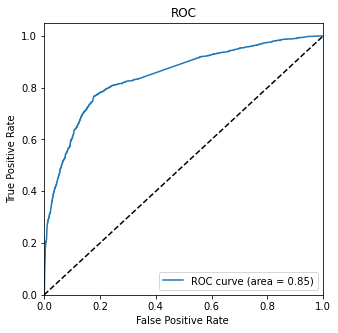

In [124]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding the optimal cutoff

In [125]:
# columns different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.323295,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.138506,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.298983,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.692438,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.197152,3934,0,1,1,0,0,0,0,0,0,0,0


In [126]:
# accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [127]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.466605  0.986618  0.146177
0.2   0.2  0.731756  0.833333  0.669165
0.3   0.3  0.794063  0.776561  0.804848
0.4   0.4  0.799011  0.710462  0.853573
0.5   0.5  0.793445  0.642336  0.886557
0.6   0.6  0.779375  0.557178  0.916292
0.7   0.7  0.761441  0.457421  0.948776
0.8   0.8  0.736858  0.352798  0.973513
0.9   0.9  0.693105  0.206813  0.992754


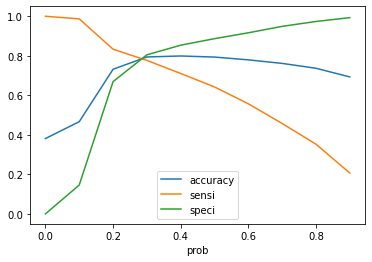

In [128]:
# accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [129]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.323295,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.138506,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.298983,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.692438,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.197152,3934,0,1,1,0,0,0,0,0,0,0,0,0


### ASSIGNING LEAD SCORE

In [130]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.323295,1871,0,1,1,1,1,0,0,0,0,0,0,1,32
1,0,0.138506,6795,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.298983,3516,0,1,1,1,0,0,0,0,0,0,0,0,30
3,0,0.692438,8105,1,1,1,1,1,1,1,1,0,0,0,1,69
4,0,0.197152,3934,0,1,1,0,0,0,0,0,0,0,0,0,20


In [131]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
#sensitivity of our logistic regression model
print(TP / float(TP+FN))


0.7765612327656123


In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.8048475762118941

In [134]:
# accuracy
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(accuracy)

0.7934446505875077


#### Precision and Recall

In [135]:
from sklearn.metrics import precision_score, recall_score
precision=precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
precision

0.7772325809617272

In [136]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6423357664233577

## Making predictions on the test set


In [137]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits',
                                                                                    'Total Time Spent on Website',
                                                                                     'Page Views Per Visit']])

In [138]:
X_train_11= X_train_10.drop(['const'], axis=1)
col2=X_train_11.columns
col2

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Not_specified',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [139]:
X_test = X_test[col2]
X_test_sm = sm.add_constant(X_test)
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Not_specified,What is your current occupation_Working Professional
4269,0,0.8,0.448735,0,0,0,0,0,1,0
2376,0,0.0,0.000000,0,1,0,0,0,1,0
7766,0,0.5,0.026187,0,0,0,0,0,0,1
9199,0,0.0,0.000000,0,0,1,0,0,1,0
4359,0,0.0,0.000000,0,1,0,0,0,0,0


In [140]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]



4269    0.483750
2376    0.807492
7766    0.769310
9199    0.197152
4359    0.890836
9186    0.417625
1631    0.598471
8963    0.131266
8007    0.254900
5324    0.191580
dtype: float64

In [141]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df= y_pred_df.rename(columns={ 0 : 'prob_converted'})
y_pred_df.head()

,prob_converted
4269,0.483750
2376,0.807492
7766,0.769310
9199,0.197152
4359,0.890836


In [142]:
y_test_df2 = pd.DataFrame(y_test)

In [143]:
#adding ID for customers
y_test_df2['ID'] = y_test_df2.index

In [144]:
# Removing index 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df2.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df2, y_pred_df],axis=1)
y_pred_final.head()

,Converted,ID,prob_converted
0,1,4269,0.483750
1,1,2376,0.807492
2,1,7766,0.769310
3,0,9199,0.197152
4,1,4359,0.890836


In [145]:
y_pred_final['final_predicted'] = y_pred_final.prob_converted.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,ID,prob_converted,final_predicted
0,1,4269,0.483750,1
1,1,2376,0.807492,1
2,1,7766,0.769310,1
3,0,9199,0.197152,0
4,1,4359,0.890836,1


In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1340,  337],
       [ 246,  849]], dtype=int64)

In [147]:
TP1 = confusion2[1,1] # true positive 
TN1 = confusion2[0,0] # true negatives
FP1 = confusion2[0,1] # false positives
FN1 = confusion2[1,0] # false negatives

In [148]:
# accuracy
accuracy1=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accuracy1


0.7896825396825397

In [149]:
#sensitivity
print(TP1 / float(TP1+FN1))

0.7753424657534247


In [150]:
#specificity
print(TN1 / float(TN1+FP1))

0.7990459153249851


In [151]:
precision1=precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
precision1

0.7158516020236088

## Summary


In [152]:
print("On train dataset:")
print("accuracy:",accuracy*100)
print("specificity:",TN / float(TN+FP)*100)
print("sensitivity:",TP / float(TP+FN)*100)
print("precision:",precision*100)
print()

print("On test dataset:")
print("accuracy:",accuracy1*100)
print("specificity:",TN1 / float(TN1+FP1)*100)
print("sensitivity:",TP1 / float(TP1+FN1)*100)
print("precision:",precision1*100)

On train dataset:
accuracy: 79.34446505875077
specificity: 80.4847576211894
sensitivity: 77.65612327656123
precision: 77.72325809617271

On test dataset:
accuracy: 78.96825396825396
specificity: 79.90459153249851
sensitivity: 77.53424657534246
precision: 71.58516020236088
